# MNIST Data

This data is of valued form of pixels of handwritten numbers 0-9

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

### Getting the data

In [1]:
import tensorflow as tf

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot= True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [11]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The data is already in a splitted form for train, test and validation

In [12]:
mnist.train.num_examples

55000

In [13]:
mnist.test.num_examples

10000

In [14]:
mnist.validation.num_examples

5000

### Visualizing the data

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
mnist.train.images[2].shape

(784,)

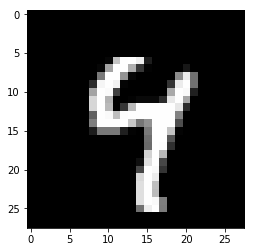

In [25]:
#Converting the flattened data into square.
plt.imshow(mnist.train.images[2].reshape((28,28)), cmap = 'gist_gray')

We can check if the data is already normalized or not

In [27]:
mnist.train.images[2].max()

1.0

In [28]:
mnist.train.images[2].min()

0.0

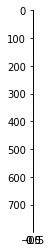

In [42]:
plt.imshow(mnist.train.images[2].reshape(784,1))

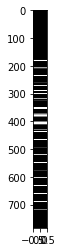

In [41]:
plt.imshow(mnist.train.images[2].reshape(784,1), cmap = 'gist_gray', aspect= 0.02)

### Creating the Model

In [43]:
x = tf.placeholder(tf.float32, shape = [None, 784])

In [44]:
W = tf.Variable(tf.zeros(shape= [784,10]))

In [45]:
b = tf.Variable(tf.zeros(shape= [10]))

In [50]:
x.shape

TensorShape([Dimension(None), Dimension(784)])

In [51]:
W.shape

TensorShape([Dimension(784), Dimension(10)])

In [52]:
#Creating a Graph
z = tf.matmul(x, W) + b

#### Loss and Optimizer

In [46]:
y_true = tf.placeholder(tf.float32, shape= [None, 10])

In [66]:
#CROSS ENTROPY
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels= y_true, logits= z))

In [71]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.1)

In [72]:
train = optimizer.minimize(cross_entropy)

### Creating the Session

In [73]:
init = tf.global_variables_initializer()

In [74]:
with tf.Session() as sess:
    sess.run(init)
    
    # Training the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for i in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict = {x: batch_x, y_true: batch_y})
        
     # Testing and Training the model
    matches = tf.equal(tf.argmax(z, 1), tf.argmax(y_true, 1))
    
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9109
